## First neural network (on the first dataset)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import torch
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn


from libs.my_conv_net import *

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
path="archive/data"
vehicles_path=os.path.join(path,"vehicles")
non_vehicles_path=os.path.join(path,"non-vehicles")

labels=[]
images=[]

for vehicle in os.listdir(vehicles_path):
    labels.append("vehicle")
    images.append(plt.imread(os.path.join(vehicles_path,vehicle)))
    
for non_vehicle in os.listdir(non_vehicles_path):
    labels.append("non_vehicle")
    images.append(plt.imread(os.path.join(non_vehicles_path,non_vehicle)))
    
data_df=pd.DataFrame({"image":images,"label":labels})

In [4]:
data_df

,image,label
0,"[[[0.32156864, 0.39607844, 0.4392157], [0.2352...",vehicle
1,"[[[0.30980393, 0.3764706, 0.22352941], [0.3058...",vehicle
2,"[[[0.7176471, 0.7529412, 0.76862746], [0.69411...",vehicle
3,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",vehicle
4,"[[[0.27450982, 0.36078432, 0.5647059], [0.2784...",vehicle
...,...,...
17755,"[[[0.36862746, 0.4, 0.37254903], [0.36862746, ...",non_vehicle
17756,"[[[0.3137255, 0.32941177, 0.2784314], [0.33725...",non_vehicle
17757,"[[[0.15294118, 0.13725491, 0.078431375], [0.14...",non_vehicle
17758,"[[[0.92941177, 0.91764706, 0.8784314], [0.9254...",non_vehicle


Text(0.5, 1.0, 'Data repartition')

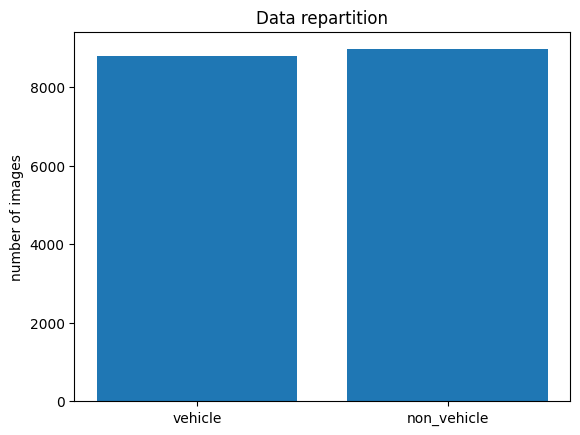

In [5]:
number_of_vehicle=len(data_df.loc[data_df["label"]=="vehicle"])
number_of_non_vehicle=len(data_df.loc[data_df["label"]=="non_vehicle"])
plt.bar(["vehicle","non_vehicle"],[number_of_vehicle,number_of_non_vehicle])
plt.ylabel('number of images')
plt.title("Data repartition")

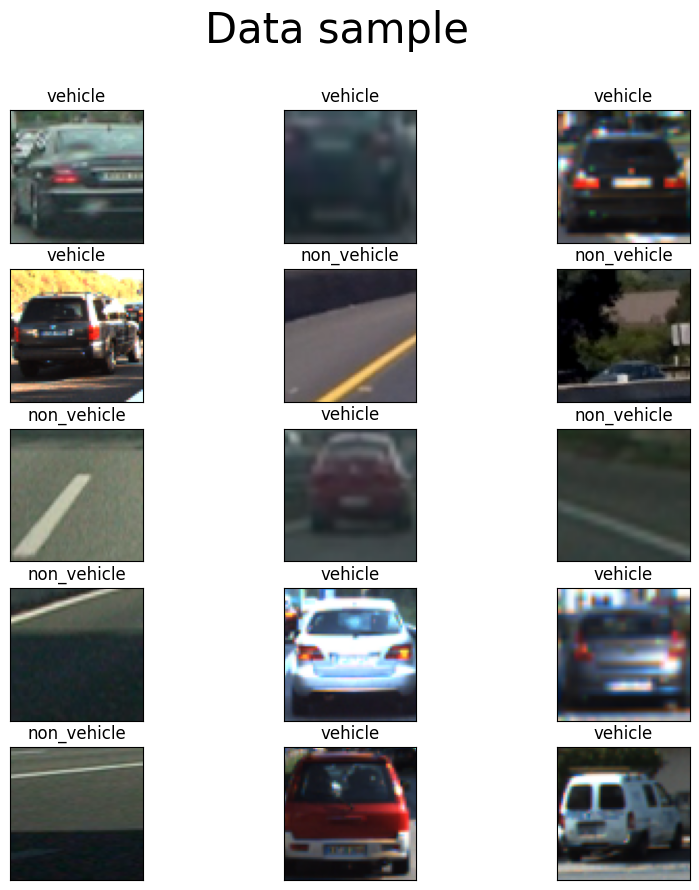

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
plot_images= random.choices(np.arange(len(data_df)),k=15)
for i,ax in enumerate(axes.flat):
    ax.imshow(data_df["image"][plot_images[i]])
    ax.set_title(data_df["label"][plot_images[i]])
fig.suptitle("Data sample",fontsize=30)
plt.savefig("captures/small_images")

In [8]:
data_df["img_shape"]=data_df["image"].apply(lambda x : x.shape)

In [9]:
data_df["img_shape"].loc[data_df["img_shape"]!=data_df.iloc[0]["img_shape"]]

Series([], Name: img_shape, dtype: object)

In [10]:
data_df=data_df.drop(["img_shape"],axis=1)

In [11]:
train_df,test_df=train_test_split(data_df,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'train/test data repartition')

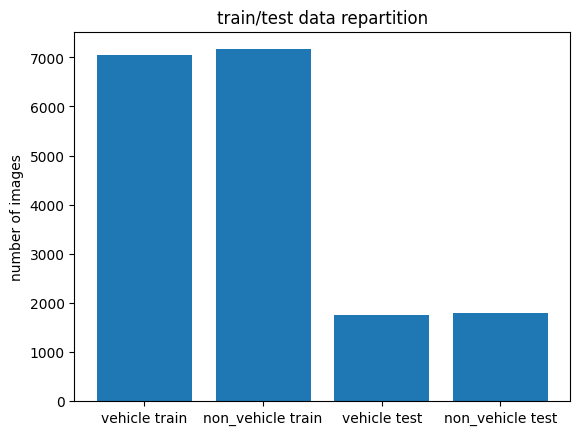

In [12]:
number_of_vehicle_training=len(train_df.loc[train_df["label"]=="vehicle"])
number_of_non_vehicle_training=len(train_df.loc[train_df["label"]=="non_vehicle"])

number_of_vehicle_testing=len(test_df.loc[test_df["label"]=="vehicle"])
number_of_non_vehicle_testing=len(test_df.loc[test_df["label"]=="non_vehicle"])


plt.bar(["vehicle train","non_vehicle train","vehicle test","non_vehicle test"],[number_of_vehicle_training,number_of_non_vehicle_training,
                                                                                number_of_vehicle_testing,number_of_non_vehicle_testing])
plt.ylabel('number of images')
plt.title("train/test data repartition")

In [16]:

train_dataset=ImageDataset(train_df,device)
test_dataset=ImageDataset(test_df,device)

batch_size=32

train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True)        

In [17]:
model=conv_net(3,2)
model.to(device)

conv_net(
  (conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (r1): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (r2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (l1): Linear(in_features=12800, out_features=500, bias=True)
  (r3): ReLU()
  (l2): Linear(in_features=500, out_features=2, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)

In [18]:
epochs=20
lr=0.001
loss=nn.NLLLoss()
optim=torch.optim.Adam(model.parameters(),lr=lr)

/home/come/anaconda3/envs/env_pocket/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


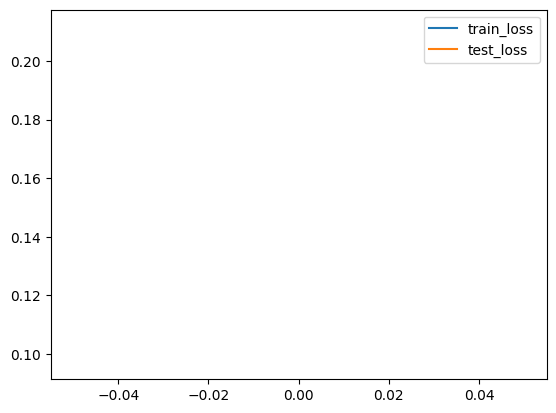

train_loss : 0.21180333961157952  | test_loss : 0.09703052916505316
train_loss : 0.06757496915225922  | test_loss : 0.0463251438220493
train_loss : 0.04038844783245041  | test_loss : 0.029385144587371265


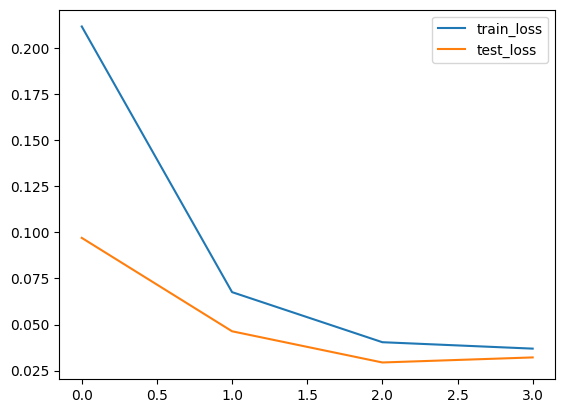

train_loss : 0.036903051064999436  | test_loss : 0.032129539036022094
train_loss : 0.024045488744148087  | test_loss : 0.09225835184370554
train_loss : 0.014607244105177783  | test_loss : 0.027242346724174363


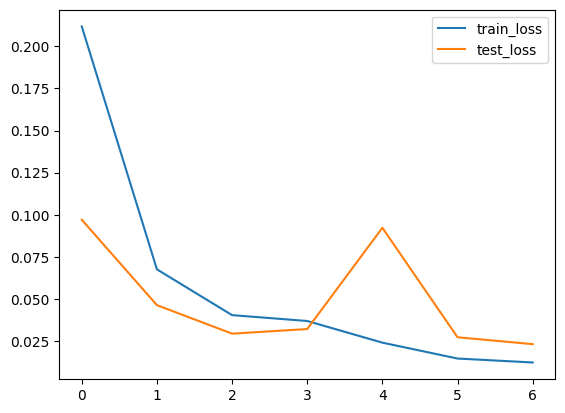

train_loss : 0.012269925496217216  | test_loss : 0.023159762181610137
train_loss : 0.017366827548275895  | test_loss : 0.024538013733937068
train_loss : 0.009019003751305505  | test_loss : 0.022252960725365468


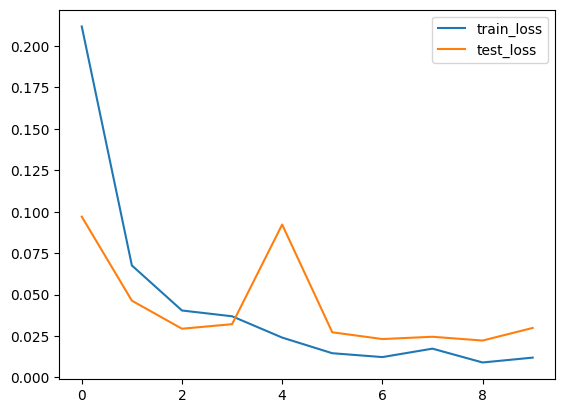

train_loss : 0.01195326988418274  | test_loss : 0.029853129972858976
train_loss : 0.013979025892576255  | test_loss : 0.030437641166966525
train_loss : 0.009614892940413762  | test_loss : 0.02421376653790929


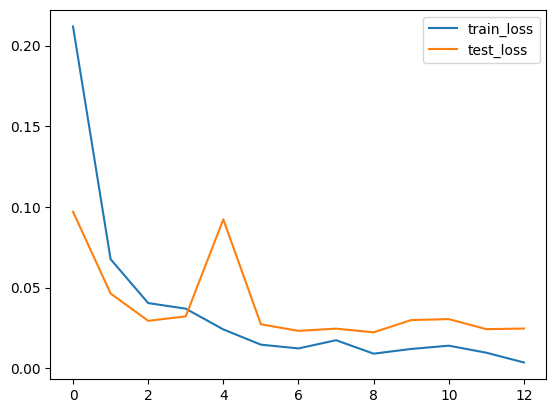

train_loss : 0.0035646794595134263  | test_loss : 0.024600152224337278
train_loss : 0.0032001522929640653  | test_loss : 0.02406672938713331
train_loss : 0.0050957684990346926  | test_loss : 0.034213998365610857


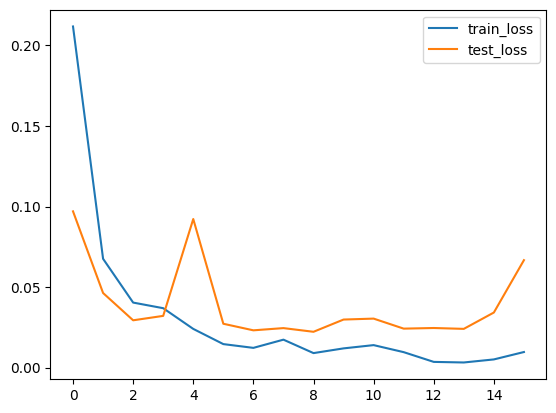

train_loss : 0.009689023292881134  | test_loss : 0.06671818523554483
train_loss : 0.008101715176204985  | test_loss : 0.02637160543611219
train_loss : 0.0017846100040123253  | test_loss : 0.0221625011812367


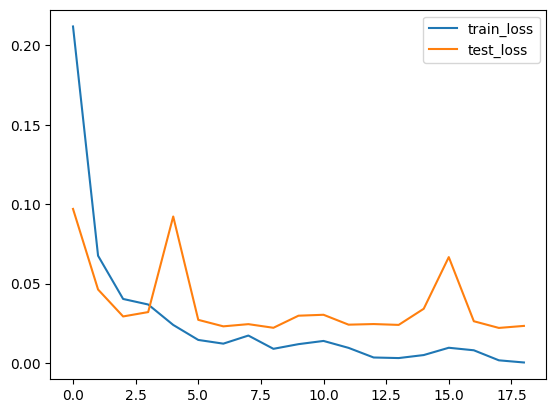

train_loss : 0.0004271072602019867  | test_loss : 0.023435070059059933
train_loss : 0.00010789683172845759  | test_loss : 0.02223472464034211


In [19]:
plot_freq=3
save_train=[]
save_test=[]

for epoch in range(epochs) :
    model.train()
    avg_train_loss=0
    avg_test_loss=0
    it_train=0
    it_test=0
    for images,label in train_loader :
        predictions=model(images)
        l=loss(predictions,label)
        optim.zero_grad()
        l.backward()
        optim.step()
        avg_train_loss+=l.item()
        it_train+=1
    model.eval()
    for images,label in test_loader:
        predictions=model(images)
        l=loss(predictions,label)
        avg_test_loss+=l.item()
        it_test+=1
    save_train.append(avg_train_loss/it_train)
    save_test.append(avg_test_loss/it_test)
    if epoch%plot_freq==0 :
        x=np.arange(0,len(save_train))
        plt.plot(x,save_train,label='train_loss')
        plt.plot(x,save_test,label="test_loss")
        plt.legend()
        plt.show()
    print("train_loss :",avg_train_loss/it_train," | test_loss :",avg_test_loss/it_test)        

In [20]:
acc=0
model.eval()
ytrue=[]
ypred=[]
for image,label in test_dataset :
    pred=int(torch.argmax(model(image.unsqueeze(0))))
    ytrue.append(label.item())
    ypred.append(pred)
    acc+=1 if pred==label.item() else 0
print("accuracy :",acc/len(test_dataset))

accuracy : 0.9954954954954955


Text(0.5, 1.0, 'Confusion matrix for the test set')

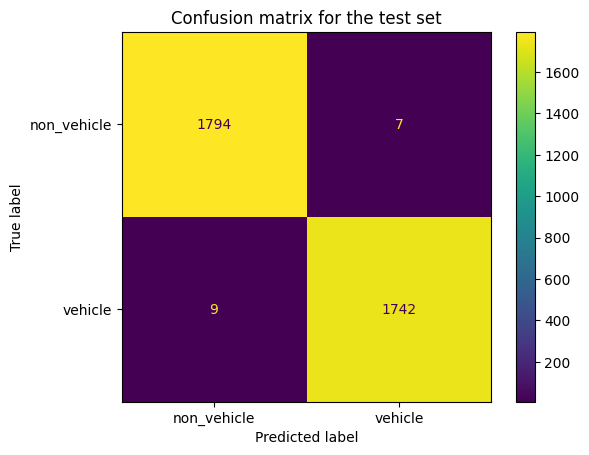

In [21]:
ConfusionMatrixDisplay(confusion_matrix(ytrue,ypred),display_labels=['non_vehicle',"vehicle"]).plot()
plt.title("Confusion matrix for the test set")

In [22]:
torch.save(model.state_dict(), "models/convnet3.pth")

In [23]:
false_images=[]
false_labels=[]
for i,(image,_) in enumerate(test_dataset) :
    if ytrue[i]!=ypred[i]:
        false_images.append(image.cpu().permute(1,2,0).numpy())
        false_labels.append("vehicle" if ypred[i] else "non_vehicle")
        

IndexError: list index out of range

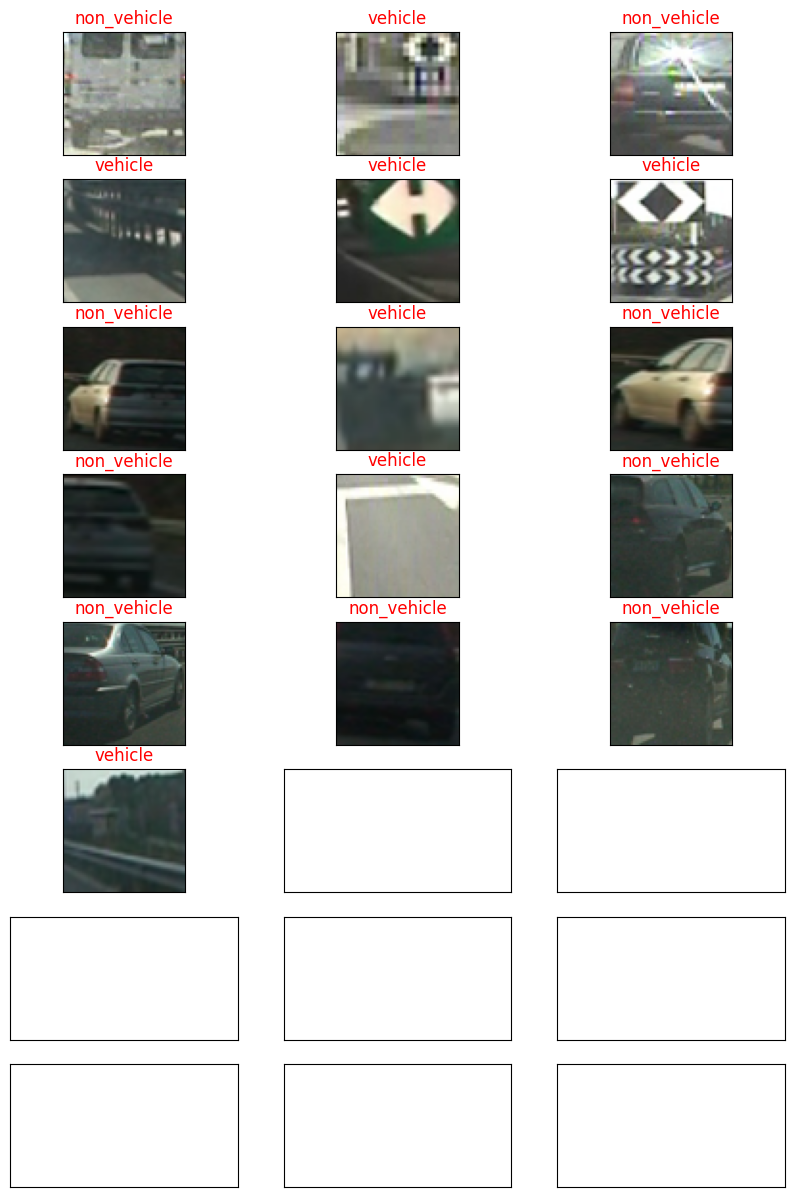

In [24]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 15),
                        subplot_kw={'xticks': [], 'yticks': []})
for i,ax in enumerate(axes.flat):
    ax.imshow(false_images[i])
    ax.set_title(false_labels[i],color="r")
fig.suptitle("Errors in classification",fontsize=30)